## defining the k-means algorithm (part 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [115]:
class k_means:
    def __init__(self, K, data_format, image_path):
        self.k = K
        self.data_format = data_format
        self.image_path = image_path
    def incahnce_contrast(self):
        im = Image.open(self.image_path)
        enhancer = ImageEnhance.Contrast(im)
        im_output = enhancer.enhance(2)
        im_output.save(self.image_path)

    def read_data(self):
        # self.incahnce_contrast()
        im = Image.open(self.image_path).convert("L")
        if(self.data_format == "gray"):
            return np.array(im).reshape(-1,1) # pixels x channels
        else:
            return plt.imread(self.image_path).reshape(-1,3)# pixels x channels
    
    def calculate_distance(self,v1,v2):
        v1 = v1-v2
        v1 = np.square(v1)
        v1 = np.sum(v1)
        v1 = np.sqrt(v1)
        return v1

    def calculate_means(self, points,rnk,means):
        # print(means)
        for i in range(0,means.shape[0]):
            count = 0
            sum = np.zeros(means[i].shape)
            for j in range(0,points.shape[0]):
                if rnk[j] == i:
                    count +=1
                    sum+=points[j]
            # print(count,sum)
            means[i] = sum / count
        return means

    def cluster(self):
        if(self.data_format == "gray"):
            # mean x its every channel
            means = np.random.uniform(1, 256, size=(self.k,1))
            
        else:
            # mean x its every channel
            means = np.random.uniform(1, 256, size=(self.k,3))
        points = self.read_data()
        rnk = np.zeros((points.shape[0],1))
        previous_means = np.array(means)
        flag = True
        itrs = 0
        while (flag):
            itrs+=1
            # calculate ranks
            for i in range(0,points.shape[0]):
                rn = -1
                min_dist = np.Inf
                for j in range(0,means.shape[0]):
                    # print(points[i],means[j])
                    temp_dist = self.calculate_distance(points[i], means[j])
                    if temp_dist < min_dist:
                        rn = j
                        min_dist = temp_dist
                rnk[i] = rn
            # re-calculating the means
            means = self.calculate_means(points, rnk, means)
            if(np.array_equal(means,previous_means)):#means.all() == previous_means.all()
                flag = False
                # print(means)
            # print(previous_means)
            print(means)
            previous_means = np.array(means)
        return (points,rnk,means)

    def confusion(self):
        metadata = self.cluster()
        confusion_matrix = np.zeros((4,4))
        pixels = metadata[0]
        f1 = False
        f2 = False
        f3 = False
        f4 = False
        for i in range (0,metadata[0].shape[0]):
            pixel = pixels[i]
            rn = np.int16(metadata[1][i])
            mean = metadata[2][rn]
            zero_dist = np.absolute(0-mean)
            one_dist = np.absolute(80-mean)
            two_dist = np.absolute(160-mean)
            three_dist = np.absolute(240-mean)
            dists = np.array([zero_dist, one_dist, two_dist, three_dist])
            if zero_dist == np.amin(dists):
                if pixel == 0:
                    confusion_matrix[0][0] = confusion_matrix[0][0]+1
                else:
                    f1 = True
                    temp = np.absolute(np.array([[85,1], [170,2], [255,3]]) - np.array([pixel, 0]))
                    # print(temp, np.argmin(temp, axis=1))
                    confusion_matrix[0][temp[np.argmin(temp, axis=0)[0]][1]] = confusion_matrix[0][temp[np.argmin(temp, axis=0)[0]][1]]+1
            elif one_dist == np.amin(dists):
                if pixel == 85:
                    confusion_matrix[1][0] = confusion_matrix[1][0]+1
                else:
                    f2 = True
                    temp = np.absolute(np.array([[0,0], [170,2], [255,3]]) - np.array([pixel, 0]))
                    confusion_matrix[1][temp[np.argmin(temp, axis=0)[0]][1]] = confusion_matrix[1][temp[np.argmin(temp, axis=0)[0]][1]]+1
            elif two_dist == np.amin(dists):
                if pixel == 170:
                    confusion_matrix[2][0] = confusion_matrix[2][0]+1
                else:
                    f3 = True
                    temp = np.absolute(np.array([[85,1], [0,0], [255,3]]) - np.array([pixel, 0]))
                    confusion_matrix[2][temp[np.argmin(temp, axis=0)[0]][1]] = confusion_matrix[2][temp[np.argmin(temp, axis=0)[0]][1]]+1
            else:
                if pixel == 255:
                    confusion_matrix[3][0] = confusion_matrix[3][0]+1
                else:
                    f4 = True
                    temp = np.absolute(np.array([[85,1], [170,2], [0,0]]) - np.array([pixel, 0]))
                    confusion_matrix[3][temp[np.argmin(temp, axis=0)[0]][1]] = confusion_matrix[3][temp[np.argmin(temp, axis=0)[0]][1]]+1
        print(f1,f2,f3,f4)
        return confusion_matrix


    def display(self,pixels,rnk):
        fig = plt.figure(figsize=(10, 7))
        for j in range(0,self.k):
            image = np.array(pixels)
            for i in range(0,image.shape[0]):
                if(rnk[i] != j):
                    image[i] = np.zeros((image[i].shape))
            if(self.data_format == "gray"):
                image = image.reshape(512,512)
            else:
                image = image.reshape(512,512,3)
            fig.add_subplot(1, self.k+1, j+1)
            plt.imshow(image,cmap='gray')#plt.imshow(image,cmap='gray')
            plt.axis('off')
        if(self.data_format == "gray"):
            image = np.array(pixels).reshape(512,512)
        else:
            image = np.array(pixels).reshape(512,512,3)
        
        fig.add_subplot(1, self.k+1, self.k+1)
        plt.imshow(image,cmap='gray')#plt.imshow(image,cmap='gray')
        plt.axis('off')



### part 2 in progress

In [119]:
m1 = k_means(4,"gray", r"dataset3\testGrayImage.jpg")
result = m1.confusion()
result

[[  0.]
 [170.]
 [ 85.]
 [255.]]
[[  0.]
 [170.]
 [ 85.]
 [255.]]
False False False False


array([[65536.,     0.,     0.,     0.],
       [65536.,     0.,     0.,     0.],
       [65536.,     0.,     0.,     0.],
       [65536.,     0.,     0.,     0.]])

In [120]:
m1 = k_means(4,"gray", r"dataset3\testGrayImage_low.jpg")
result = m1.confusion()
result

[[  4.06634731]
 [ 84.49486346]
 [169.27149607]
 [250.01291845]]
[[  4.05990326]
 [ 84.49549838]
 [169.51240615]
 [250.47707542]]
[[  4.05990326]
 [ 84.49614698]
 [169.51305489]
 [250.47707542]]
[[  4.05990326]
 [ 84.49614698]
 [169.51305489]
 [250.47707542]]


C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.absolute(np.array([[85,1], [170,2], [255,3]]) - np.array([pixel, 0]))
C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.absolute(np.array([[85,1], [0,0], [255,3]]) - np.array([pixel, 0]))
C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

True True True True


array([[13623., 51916.,     0.,     0.],
       [ 2897.,     0., 62636.,     0.],
       [ 2926.,     0.,     0., 62605.],
       [65541.,     0.,     0.,     0.]])

In [121]:
m1 = k_means(4,"gray", r"dataset3\testGrayImage_mid.jpg")
result = m1.confusion()
result

[[174.89789627]
 [ 51.95502534]
 [157.32778748]
 [244.64024191]]
[[179.9293121 ]
 [ 41.88489619]
 [146.49134325]
 [247.80236896]]
[[178.43089776]
 [ 36.58247436]
 [131.84729639]
 [247.92640614]]
[[174.64523603]
 [ 28.19080549]
 [110.5605554 ]
 [247.92640614]]
[[170.93250972]
 [ 14.55326505]
 [ 91.87952545]
 [247.87213772]]
[[169.57044748]
 [  7.54635589]
 [ 85.77414287]
 [247.80236896]]
[[169.2514646 ]
 [  6.77607469]
 [ 84.82781162]
 [247.76239319]]
[[169.2514646 ]
 [  6.72675211]
 [ 84.77830689]
 [247.76239319]]
[[169.2514646 ]
 [  6.72675211]
 [ 84.77830689]
 [247.76239319]]


C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.absolute(np.array([[85,1], [170,2], [255,3]]) - np.array([pixel, 0]))
C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.absolute(np.array([[85,1], [0,0], [255,3]]) - np.array([pixel, 0]))
C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

True True True True


array([[15953., 50053.,     0.,     0.],
       [ 1655.,     0., 63444.,     0.],
       [ 1685.,     0.,     0., 63350.],
       [66004.,     0.,     0.,     0.]])

In [122]:
m1 = k_means(4,"gray", r"dataset3\testGrayImage_high.jpg")
result = m1.confusion()
result

[[244.83187847]
 [185.95284079]
 [167.56722556]
 [ 63.30674248]]
[[245.76068936]
 [190.74692013]
 [153.42623347]
 [ 43.82809006]]
[[246.13286616]
 [188.99739444]
 [140.52512888]
 [ 37.03636172]]
[[246.01094223]
 [183.82193074]
 [126.20540965]
 [ 31.06581729]]
[[245.64488265]
 [178.45465297]
 [111.42073493]
 [ 24.23949898]]
[[245.41413715]
 [173.68700798]
 [ 98.02282959]
 [ 17.14246462]]
[[244.98440221]
 [170.53360556]
 [ 90.63658604]
 [ 12.60037518]]
[[244.67317426]
 [169.03246963]
 [ 87.68610194]
 [ 10.84750999]]
[[244.48070175]
 [168.35661323]
 [ 86.74917523]
 [ 10.41148444]]
[[244.48070175]
 [168.13870218]
 [ 86.31402667]
 [ 10.21259199]]
[[244.48070175]
 [168.13870218]
 [ 86.31402667]
 [ 10.21259199]]


C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.absolute(np.array([[85,1], [170,2], [255,3]]) - np.array([pixel, 0]))
C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.absolute(np.array([[85,1], [0,0], [255,3]]) - np.array([pixel, 0]))
C:\Users\MO7AMA~1\AppData\Local\Temp/ipykernel_5568/2700967594.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

True True True True


array([[17651., 50837.,     0.,     0.],
       [ 1179.,     0., 61580.,     0.],
       [ 1211.,     0.,     0., 61571.],
       [68115.,     0.,     0.,     0.]])

### part 3

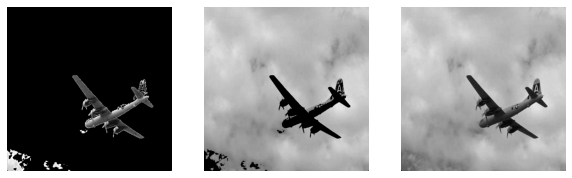

In [13]:
m1 = k_means(2,"gray", r"data_scaled\2.jpg")
result = m1.cluster()
m1.display(result[0],result[1])

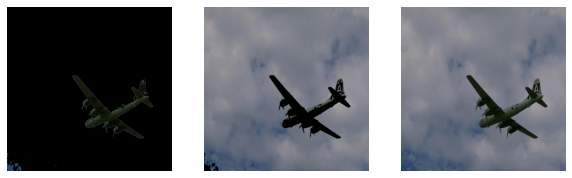

In [14]:
m1 = k_means(2,"rgb", r"data_scaled\2col.jpg")
result = m1.cluster()
m1.display(result[0],result[1])

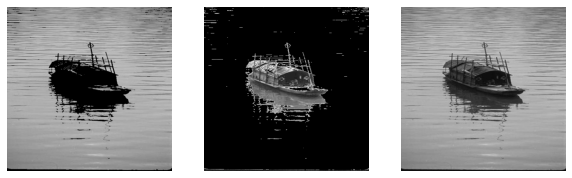

In [ ]:
m1 = k_means(2,"gray", r"data_scaled\4.jpg")
result = m1.cluster()
m1.display(result[0],result[1])

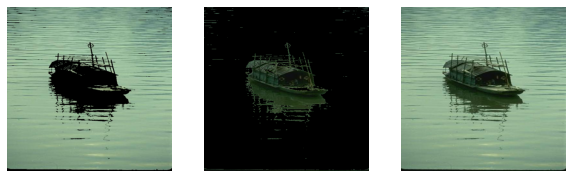

In [15]:
m1 = k_means(2,"rgb", r"data_scaled\4col.jpg")
result = m1.cluster()
m1.display(result[0],result[1])

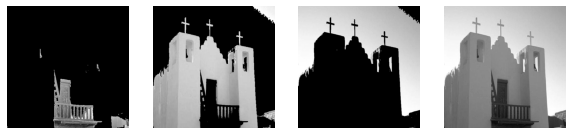

In [157]:
m1 = k_means(3,"gray", r"data_scaled\5.jpg")
result = m1.cluster()
m1.display(result[0],result[1])

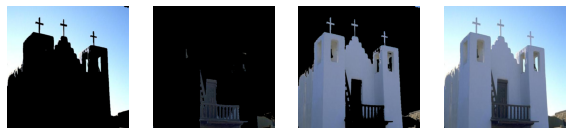

In [20]:
m1 = k_means(3,"rgb", r"data_scaled\5col.jpg")
result = m1.cluster()
m1.display(result[0],result[1])